In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! /content/drive/MyDrive/drug-classification

/bin/bash: /content/drive/MyDrive/drug-classification: Is a directory


In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd 
df=pd.read_csv("/content/drive/MyDrive/drug-classification/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


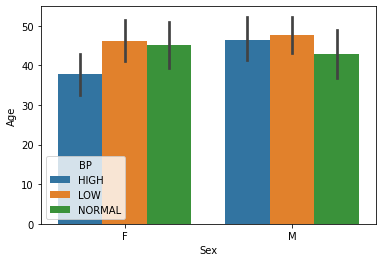

In [6]:
sb.barplot(x='Sex',y='Age',data=df,hue='BP')
plt.show()

<module 'seaborn' from '/usr/local/lib/python3.8/dist-packages/seaborn/__init__.py'>

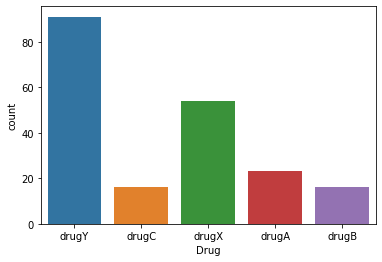

In [7]:
sb.countplot(x = "Drug", data = df  )
sb

In [8]:
encoder = LabelEncoder()
df['Drug'] = encoder.fit_transform(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,2
196,16,M,LOW,HIGH,12.006,2
197,52,M,NORMAL,HIGH,9.894,3
198,23,M,NORMAL,NORMAL,14.020,3


In [9]:
oe=OrdinalEncoder(categories=[['F','M'],['HIGH','LOW','NORMAL'],['HIGH','NORMAL']])
df.iloc[:,1:4]=oe.fit_transform(df.iloc[:,1:4])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4
1,47,1.0,1.0,0.0,13.093,2
2,47,1.0,1.0,0.0,10.114,2
3,28,0.0,2.0,0.0,7.798,3
4,61,0.0,1.0,0.0,18.043,4
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2
196,16,1.0,1.0,0.0,12.006,2
197,52,1.0,2.0,0.0,9.894,3
198,23,1.0,2.0,1.0,14.020,3


In [10]:
feature=df.iloc[:,0:5]
feature

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [11]:
lable = df.iloc[:, -1:]
lable

,Drug
0,4
1,2
2,2
3,3
4,4
...,...
195,2
196,2
197,3
198,3


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(feature,lable,test_size=0.2, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
predicted = classifier.predict(X_test)
predicted

array([3, 4, 3, 2, 4, 3, 3, 4, 4, 4, 3, 2, 4, 4, 0, 0, 3, 3, 1, 4, 3, 3,
       3, 4, 1, 3, 3, 4, 2, 3, 2, 4, 4, 4, 0, 4, 0, 4, 4, 4])

In [19]:
classifier.score(X_test,Y_test)

1.0

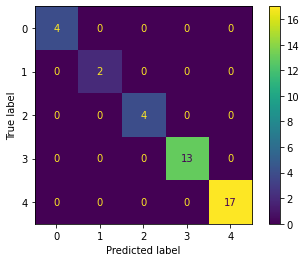

In [20]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()